In [3]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import random
import warnings

warnings.filterwarnings("ignore")

In [4]:
#file path to csv
hate_crime_csv = "Resources/hate_crime.csv"
#import csv to dataframe
hate_crime_df = pd.read_csv(hate_crime_csv, low_memory = False)
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [5]:
#filter data to reflect needed info
filtered_df = hate_crime_df[["DATA_YEAR", "REGION_NAME","INCIDENT_DATE","OFFENSE_NAME","BIAS_DESC"]]

filtered_df.head()

,DATA_YEAR,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,BIAS_DESC
0,1991,South,31-AUG-91,Intimidation,Anti-Black or African American
1,1991,South,19-SEP-91,Simple Assault,Anti-White
2,1991,South,04-JUL-91,Aggravated Assault,Anti-Black or African American
3,1991,South,24-DEC-91,Aggravated Assault;Destruction/Damage/Vandalis...,Anti-White
4,1991,South,23-DEC-91,Aggravated Assault,Anti-White


In [6]:
#filter data by year in DataFrames
year_filter = filtered_df[(filtered_df["DATA_YEAR"]>= 2014) & (hate_crime_df["DATA_YEAR"] <= 2018)]

In [7]:
#Determine Quarter for the data 
year_filter["INCIDENT_DATE"] = pd.to_datetime(year_filter["INCIDENT_DATE"])
year_filter['Quarter'] = year_filter['INCIDENT_DATE'].dt.quarter

year_filter.head()

,DATA_YEAR,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,BIAS_DESC,Quarter
169146,2014,West,2014-12-06,Destruction/Damage/Vandalism of Property,Anti-Gay (Male),4
169147,2014,West,2014-07-18,Aggravated Assault,Anti-American Indian or Alaska Native,3
169148,2014,West,2014-07-09,Simple Assault,Anti-Black or African American,3
169149,2014,West,2014-09-26,Robbery,Anti-American Indian or Alaska Native,3
169150,2014,West,2014-09-30,Simple Assault,Anti-American Indian or Alaska Native,3


Quarter 1 2014-2018

In [8]:
#Seperate all of Quarter 1 
Q1 = year_filter[(year_filter["Quarter"]==1)]

Q1.head()

,DATA_YEAR,REGION_NAME,INCIDENT_DATE,OFFENSE_NAME,BIAS_DESC,Quarter
169153,2014,South,2014-03-22,Simple Assault,Anti-Jewish,1
169169,2014,South,2014-02-17,Intimidation,Anti-Black or African American,1
169173,2014,West,2014-01-24,Intimidation,Anti-Black or African American,1
169174,2014,West,2014-01-24,Intimidation,Anti-Gay (Male),1
169175,2014,West,2014-01-28,Simple Assault,Anti-Gay (Male),1


In [9]:
#number of offenses
Q1["OFFENSE_NAME"].value_counts()

Destruction/Damage/Vandalism of Property                                                1925
Intimidation                                                                            1795
Simple Assault                                                                          1422
Aggravated Assault                                                                       687
Burglary/Breaking & Entering                                                             155
                                                                                        ... 
Counterfeiting/Forgery;Embezzlement                                                        1
Burglary/Breaking & Entering;Intimidation;Simple Assault                                   1
Aggravated Assault;Destruction/Damage/Vandalism of Property;Stolen Property Offenses       1
Burglary/Breaking & Entering;Simple Assault                                                1
Aggravated Assault;Destruction/Damage/Vandalism of Property;Intimidati

In [25]:
sim_offense1 = Q1.replace({
   " Aggravated Assault;All Other":"Aggravated Assualt", "Intimidation;Simple Assault": "Simple Assault"})

In [26]:
counts = sim_offense1["OFFENSE_NAME"].value_counts()

#drop counts of crime less than one percent for a cleaner pie chart
counts = counts.where(counts>100).dropna(how="any")

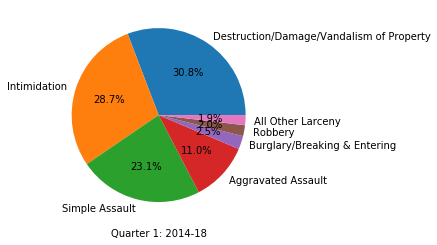

In [27]:
#pie chart for Q1 offense

plt.pie(counts.values, labels=counts.index.values, autopct="%1.1f%%")
plt.xlabel("Quarter 1: 2014-18")
plt.show()

Quarter 2 2014-2018

In [22]:
#filter out all of Quarter 2
Q2 = year_filter[(year_filter["Quarter"]==2)]

In [24]:
Q2["OFFENSE_NAME"].value_counts()

Destruction/Damage/Vandalism of Property                                              2357
Intimidation                                                                          2015
Simple Assault                                                                        1901
Aggravated Assault                                                                     890
Robbery                                                                                173
                                                                                      ... 
Aggravated Assault;Not Specified                                                         1
Credit Card/Automated Teller Machine Fraud;False Pretenses/Swindle/Confidence Game       1
Intimidation;Not Specified                                                               1
Bribery                                                                                  1
Counterfeiting/Forgery;False Pretenses/Swindle/Confidence Game                           1

In [28]:
sim_offense2 = Q2.replace({
   " Aggravated Assault;All Other":"Aggravated Assualt", "Intimidation;Simple Assault": "Simple Assault"})

In [33]:
count2 = sim_offense2["OFFENSE_NAME"].value_counts()

#drop counts of crime less than one percent for a cleaner pie chart
count2 = count2.where(count2>100).dropna(how="any")

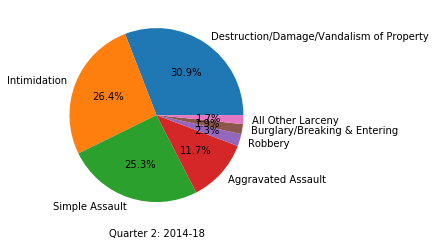

In [34]:
#pie chart for Q2 offense
plt.pie(count2.values, labels=count2.index.values, autopct="%1.1f%%")
plt.xlabel("Quarter 2: 2014-18")
plt.show()

Quarter 3 2014-2018

In [38]:
#filter out all of Quarter 3
Q3 = year_filter[(year_filter["Quarter"]==3)]

In [39]:
Q3["OFFENSE_NAME"].value_counts()

Destruction/Damage/Vandalism of Property                     2331
Intimidation                                                 2115
Simple Assault                                               1954
Aggravated Assault                                            968
All Other Larceny                                             159
                                                             ... 
Aggravated Assault;Prostitution;Simple Assault                  1
All Other Larceny;False Pretenses/Swindle/Confidence Game       1
Robbery;Shoplifting                                             1
Human Trafficking, Commercial Sex Acts                          1
Burglary/Breaking & Entering;Not Specified                      1
Name: OFFENSE_NAME, Length: 122, dtype: int64

In [40]:
sim_offense3 = Q3.replace({
   " Aggravated Assault;All Other":"Aggravated Assualt", "Intimidation;Simple Assault": "Simple Assault"})

In [41]:
count3 = sim_offense3["OFFENSE_NAME"].value_counts()

#drop counts of crime less than one percent for a cleaner pie chart
count3 = count3.where(count3>100).dropna(how="any")

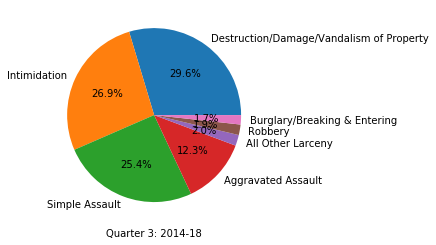

In [42]:
#pie chart for Q3 offense
plt.pie(count3.values, labels=count3.index.values, autopct="%1.1f%%")
plt.xlabel("Quarter 3: 2014-18")
plt.show()

Quarter 4 2014-2018

In [43]:
#filter out all of Quarter 4
Q4 = year_filter[(year_filter["Quarter"]==4)]

In [44]:
Q4["OFFENSE_NAME"].value_counts()

Destruction/Damage/Vandalism of Property                                                                  2412
Intimidation                                                                                              1997
Simple Assault                                                                                            1698
Aggravated Assault                                                                                         733
Robbery                                                                                                    145
                                                                                                          ... 
Counterfeiting/Forgery;Destruction/Damage/Vandalism of Property;Drug/Narcotic Violations;Impersonation       1
Arson;Theft From Motor Vehicle                                                                               1
Aggravated Assault;All Other Larceny                                                                         1
A

In [45]:
sim_offense4 = Q4.replace({
   " Aggravated Assault;All Other":"Aggravated Assualt", "Intimidation;Simple Assault": "Simple Assault"})

In [46]:
count4 = sim_offense4["OFFENSE_NAME"].value_counts()

#drop counts of crime less than one percent for a cleaner pie chart
count4= count4.where(count4>100).dropna(how="any")

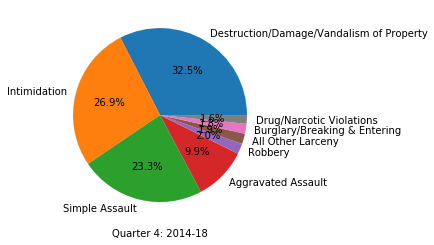

In [47]:
#pie chart for Q3 offense
plt.pie(count4.values, labels=count4.index.values, autopct="%1.1f%%")
plt.xlabel("Quarter 4: 2014-18")
plt.show()